In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from process_image import load_faces_to_array

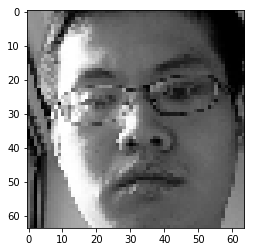

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
test = load_faces_to_array('Me', 64, 64)[5]

plt.imshow(test.reshape(64, 64), cmap=plt.cm.Greys_r)

In [90]:
me = load_faces_to_array('Me', 64, 64)
notme = load_faces_to_array('notMe', 64, 64)

me = me.astype('float32')
notme = notme.astype('float32')
me /= 255
notme /= 255

In [91]:
X = np.vstack([me, notme])
y = np.repeat([1, 0], [me.shape[0], notme.shape[0]])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
                                                    shuffle=True, stratify=y,
                                                   random_state=1024)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [143]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
# model.add(Dropout(0.25))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
activation_89 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_90 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 31, 31, 64)        18496     
__________

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 1..., padding="same")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', 
             metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=20, shuffle=False)

In [149]:
# save the model
model.save('./model.h5')

2 wrongly predicted pictures.


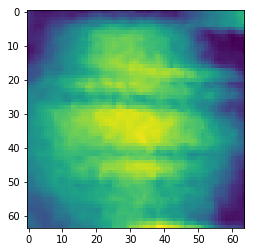

In [147]:
# find the wrong predictions
test_prediction = model.predict(X_test)

y_test_label = np.argmax(y_test, axis=1)
pred_test = np.argmax(test_prediction, axis=1)
wrong_pred = y_test_label != pred_test
print('{} wrongly predicted pictures.'.format(wrong_pred.sum()))
wrong_pred = X_test[wrong_pred]

plt.imshow(wrong_pred[0].squeeze())

In [154]:
np.argmax(test_prediction, axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1])

In [157]:
np.roll([1, 2, 3, 4], shift=-1)

array([2, 3, 4, 1])